### Notebook for demonstrating dense grip map prediction inference

In [6]:
RGB = False # Change to False for fusion model
device = "cpu" # Change to 'cpu' to run without gpu

In [7]:
import torch
import config
from models import custom_smp_model, middle_fusion
from utils.fix_weights import load_fixed_weights
from torch.utils.data import DataLoader
from utils.demoset import DemoSet
from utils.plot_outputs import plot_image

#### Load RGB or fusion model

In [8]:
if RGB:
    model = custom_smp_model.SMPModel(model="FPN",
                                        encoder="resnet18",
                                        in_channels=3,
                                        out_channels=4)
    model = load_fixed_weights(model, "rgb.pt", device=device)
else:
    model = middle_fusion.MiddleFusionFPN(modalities=['rgb','thermal','reflectance'],
                                                    encoder_rgb='resnet18',
                                                    encoder_thermal='resnet18',
                                                    encoder_reflectance='resnet18',
                                                    out_channels=4,
                                                    dropout=0.2,
                                                    fusion_merge='cat')
    model = load_fixed_weights(model, "rgb_t_r.pt", device=device)
model.to(device)

MiddleFusionFPN(
  (rgb_encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

#### Initialise demoloader

In [9]:
inputs = ['rgb']
if not RGB:
    inputs.append('thermal')
    inputs.append('reflectance')
testset = DemoSet('Test', 'data', inputs=inputs)
demoloader = DataLoader(testset, batch_size=1, num_workers=8, drop_last=False)

#### Iterate demoloader and plot RGB inputs and outputs

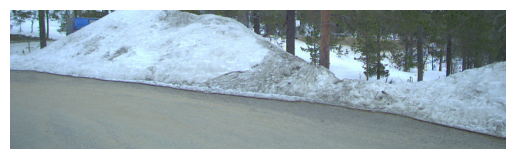

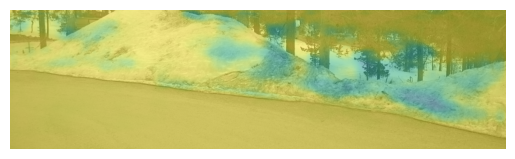

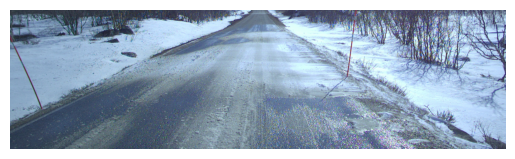

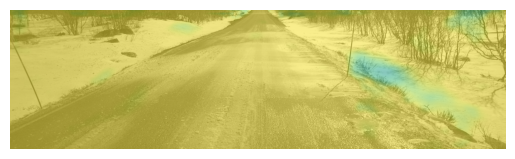

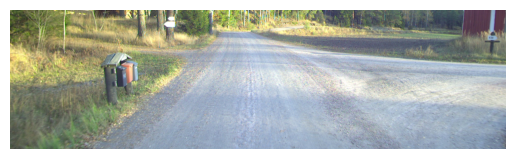

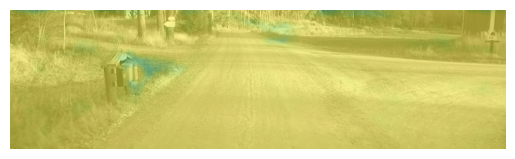

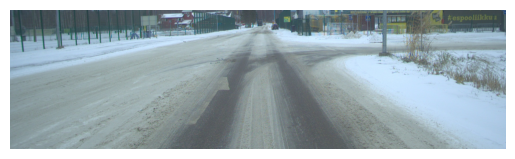

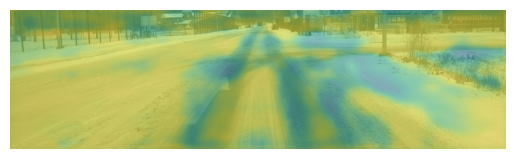

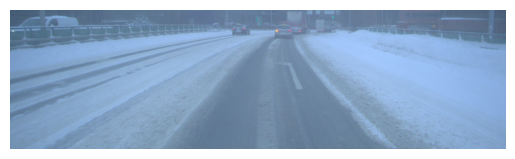

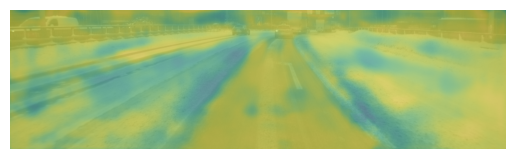

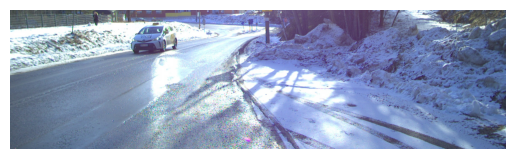

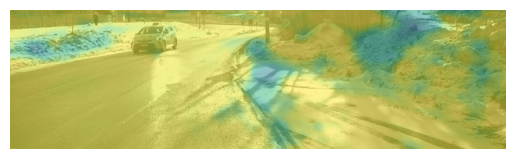

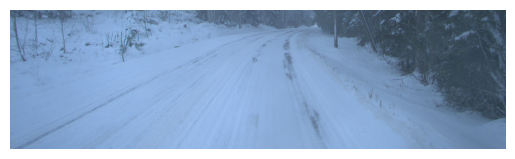

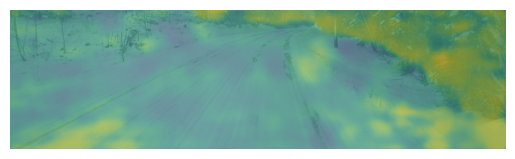

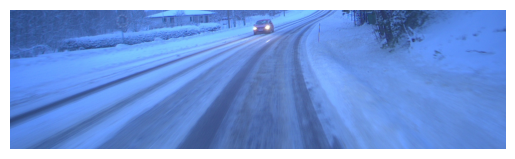

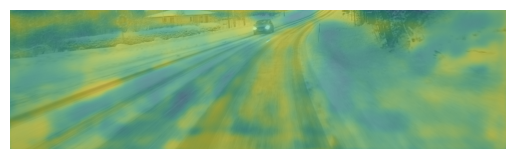

In [10]:
for i, batch in enumerate(demoloader):
    inputs = [batch['rgb'].to(device)]
    if not RGB:
        inputs.append(batch['thermal'].to(device))
        inputs.append(batch['reflectance'].to(device))
    input = torch.cat(inputs, dim=1)
    # Generate outputs
    outputs = model(input)
    
    # The output colourmap is normalised to the range [0.1, 0.82]
    plot_image(batch, outputs)